In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone

In [2]:
df = pd.read_csv('Telecom_Customer_Churn_Data.csv')
df.head()

,State,Account Length,Area Code,Phone Number,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,...,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           5000 non-null   object 
 1   Account Length                  5000 non-null   int64  
 2   Area Code                       5000 non-null   int64  
 3   Phone Number                    5000 non-null   object 
 4   International Plan              5000 non-null   object 
 5   Voice mail Plan                 5000 non-null   object 
 6   Num of Voice mail Messages      5000 non-null   int64  
 7   Total Day Minutes               5000 non-null   float64
 8   Total Day Calls                 5000 non-null   int64  
 9   Total day Charge                5000 non-null   float64
 10  Total Eve Minutes               5000 non-null   float64
 11  Total Eve Calls                 5000 non-null   int64  
 12  Total Eve Charge                50

In [4]:
categorical_cols = ['State', 'International Plan', 'Voice mail Plan', 'Churn']
labels_encoders = {col: LabelEncoder().fit(df[col].unique()) for col in categorical_cols}
target_labels = df[categorical_cols[-1]].unique()

In [5]:
df_encoded = df.copy().drop(columns = ['Phone Number'], axis=1)
for col in categorical_cols:
    df_encoded[col] = labels_encoders[col].transform(df_encoded[col])
# End For
df_encoded

,State,Account Length,Area Code,International Plan,Voice mail Plan,Num of Voice mail Messages,Total Day Minutes,Total Day Calls,Total day Charge,Total Eve Minutes,Total Eve Calls,Total Eve Charge,Total Night Minutes,Total Night Calls,Total Night Charge,Total International Minutes,Total Intl Calls,Total Intl Charge,Number Customer Service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D1CAA3CE08>,
      dtype=object)

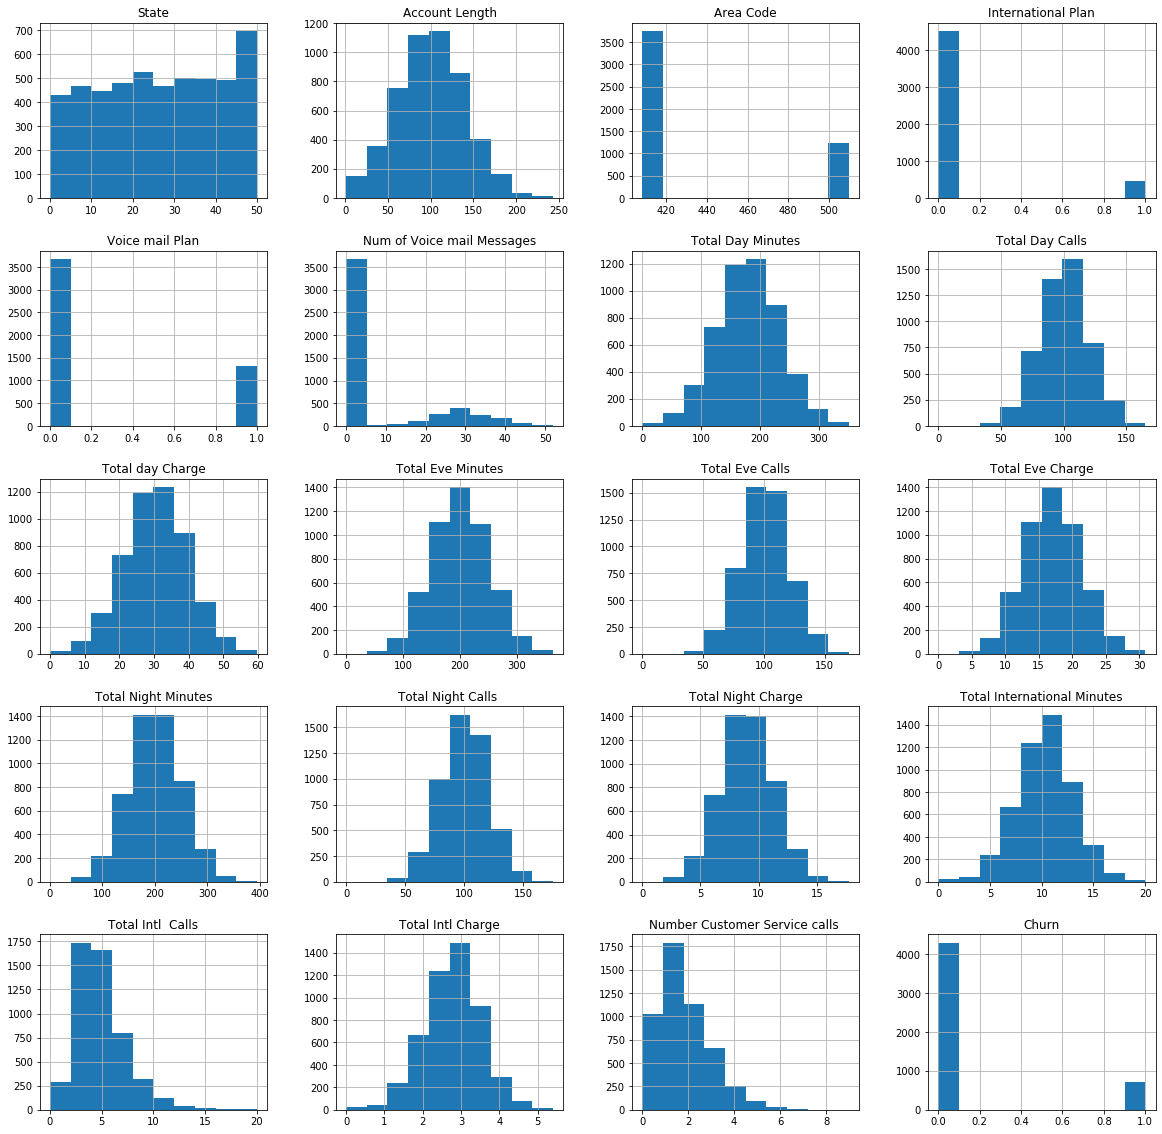

In [6]:
df_encoded.hist(figsize=(20, 20))

In [7]:
X, y = df_encoded.iloc[:, :-1].values, df_encoded.iloc[:, -1].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
model = LogisticRegression(C=0.01, solver='liblinear')
scores = cross_val_score(clone(model), X, y, cv=10)
print(f'Cross Validation Results: {scores * 100} %')
print(f'Avg Accuracy: { scores.mean() * 100 } %')

Cross Validation Results: [86.4 86.4 86.2 85.6 86.4 86.2 86.2 87.4 86.  86.8] %
Avg Accuracy: 86.35999999999999 %


Accuracy: 86.93333333333332 %
Classification Report: 
               precision    recall  f1-score   support

      False.       0.99      0.87      0.93      1469
       True.       0.10      0.68      0.18        31

    accuracy                           0.87      1500
   macro avg       0.55      0.78      0.55      1500
weighted avg       0.97      0.87      0.91      1500



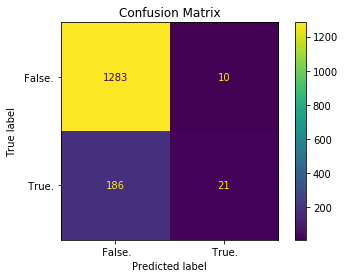

In [10]:
y_predict = model.fit(X_train, y_train).predict(X_test)
print(f'Accuracy: {accuracy_score(y_predict, y_test) * 100} %')
print(f'Classification Report: \n {classification_report(y_predict, y_test, target_names = target_labels)}')
plot_confusion_matrix(model, X_test, y_test, display_labels = target_labels, values_format='d')
plt.title('Confusion Matrix')
plt.show()
plot_confusion_matrix?